In [7]:
import sys
sys.path.append('/home/tpopova/prj/PB_SCF/charge_surface/py_files')
from flatQuenchedBrush import flatQuenchedBrush
from create_in import create_in
import matplotlib.pyplot as plt

Параметры

In [8]:
N = 300
# S = 150

S_namics = 150

alpha = 0.5

Cs = 0.001

surf_val_values = [0, 0.1, 0.15, 0.25, 0.35]
chi = 0.5
chi_surf = -0.3

<>:60: SyntaxWarning: invalid escape sequence '\c'
<>:60: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_2150521/653176164.py:60: SyntaxWarning: invalid escape sequence '\c'
  plt.legend(title = f"$N = {N}, S_{{scf}} = {S_namics}, Cs = {Cs}, \\alpha = {alpha}, \chi = {chi}$", fontsize=9)


Problem nr 1 out of 1
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
NEWTON has been notified.
Your guess:it =  0  E = 2.315377e+00 |g| = 6.222517e+00 alpha = 1.000000e+00 
hessian scaling: 1.36115
it =  1  E = 2.075737e+00 |g| = 5.501232e+00 alpha = 1.160707e-01 
it =  2  E = 2.537748e+00 |g| = 6.257406e+00 alpha = 8.305447e-02 
it =  3  E = 8.802951e+00 |g| = 6.801195e+00 alpha = 8.062682e-03 
it =  4  E = 8.495564e+00 |g| = 6.481663e+00 alpha = 8.526607e-03 
it =  5  E = 6.433370e+00 |g| = 6.497766e+00 alpha = 1.426931e-02 
it =  6  E = 7.244819e+00 |g| = 6.516441e+00 alpha = 1.053155e-02 
it =  7  E = 7.560617e+00 |g| = 6.251305e+00 alpha = 8.634895e-03 
it =  8  E = 1.199635e+01 |g| = 6.168118e+00 alpha = 3.666483e-03 
it =  9  E = 7.713081e+00 |g| = 6.104459e+00 alpha = 8.115478e-03 
it =  10  E = 9.777282e+00 |g| = 6.051924e+00

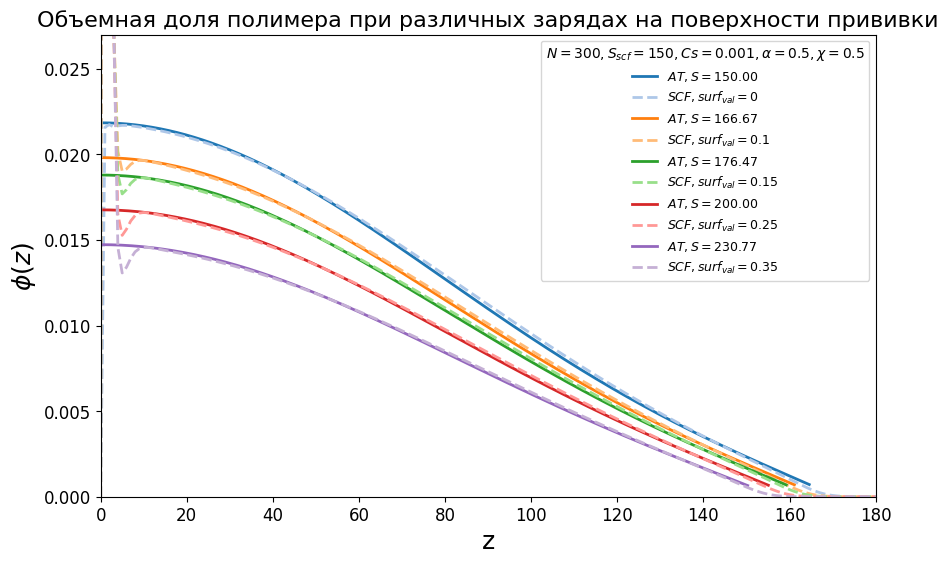

In [9]:
history = []

plt.figure(figsize=(10, 6))

# Цветовая палитра: пара цветов для каждой линии
colors = [
    ('#1f77b4', '#aec7e8'),  # Синий и светло-синий
    ('#ff7f0e', '#ffbb78'),  # Оранжевый и светло-оранжевый
    ('#2ca02c', '#98df8a'),  # Зелёный и светло-зелёный
    ('#d62728', '#ff9896'),  # Красный и светло-красный
    ('#9467bd', '#c5b0d5')   # Фиолетовый и светло-фиолетовый
]

for idx, surf_val in enumerate(surf_val_values):
    # Рассчитать S для аналитической теории
    S = (alpha * N * S_namics) / (alpha * N - surf_val * S_namics)
    
    # Создать SCF файл
    file_name_pro = create_in(
        template_surf_charge='/home/tpopova/prj/PB_SCF/charge_surface/scf_templates/flat_brush_surf.in',
        range_param='Cs',
        min_val=0.1,
        max_val=0.1,
        Cs=Cs,
        chi=chi,
        chi_surf=chi_surf,
        N_layers=N,
        N=N,
        S=S_namics,
        alpha=alpha,
        surf_val=surf_val
    )
    
    # Получить результаты расчёта
    H_q, z_in_range_q, z_out_range_q, c_p, y_in, y_out, y_exp_in, y_exp_out, y_exp_q_in, y_exp_q_out, \
        f_ion_SCF_quen, Q_SCF_quen, parse_SCF_psi_quen, parse_SCF_phi_quen = flatQuenchedBrush(
            N=N,
            S=S,
            alpha=alpha,
            Cs=Cs,
            file_names=file_name_pro
    )
    
    # Сохранить историю
    history.append((surf_val, S))
    
    # Выбрать цвета из палитры
    color_main, color_secondary = colors[idx % len(colors)]
    
    # Построить графики
    plt.plot(z_in_range_q, c_p, label=f'$AT, S={S:.2f}$', color=color_main, linewidth=2)
    plt.plot(parse_SCF_phi_quen, '--', label=f'$SCF, surf_{{val}}={surf_val}$', color=color_secondary, linewidth=2)

# Настройки графика
plt.ylim(0, 0.027)
plt.xlim(0, 180)
plt.xlabel('z', fontsize=18)
plt.ylabel(r'$\phi(z)$', fontsize=18)
plt.title('Объемная доля полимера при различных зарядах на поверхности прививки', fontsize=16)
plt.legend(title = f"$N = {N}, S_{{scf}} = {S_namics}, Cs = {Cs}, \\alpha = {alpha}, \chi = {chi}$", fontsize=9)
plt.tick_params(axis='both', which='major', labelsize=12)  # Увеличение размера цифр на осях
plt.savefig('Fig_1.pdf', dpi=300, bbox_inches='tight')
plt.show()


# # Вывод истории значений
# for surf_val, S in history:
#     print(f'surf_val: {surf_val}, S: {S:.2f}')